In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.tsa.stattools as stattools
import statsmodels.graphics.tsaplots as tsaplots
from pandas.plotting import autocorrelation_plot

In [31]:
air_miles = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970': 'Air miles flown'}, 
               inplace=True)

In [32]:
MA12 = air_miles['Air miles flown'].rolling(window=12).mean()
trendComp = MA12.rolling(window=2).mean()

In [33]:
residuals = air_miles['Air miles flown'] - trendComp
#To find the sesonal compute we have to take monthwise average of these residuals
month = air_miles['Month'].map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
#Number of years for which we have the data
nb_years = 1970-1963+1
seasonalComp = np.array([monthwise_avg.values[:12]]*nb_years).reshape((12*nb_years,))

In [34]:
irr_var = air_miles['Air miles flown'] - trendComp - seasonalComp

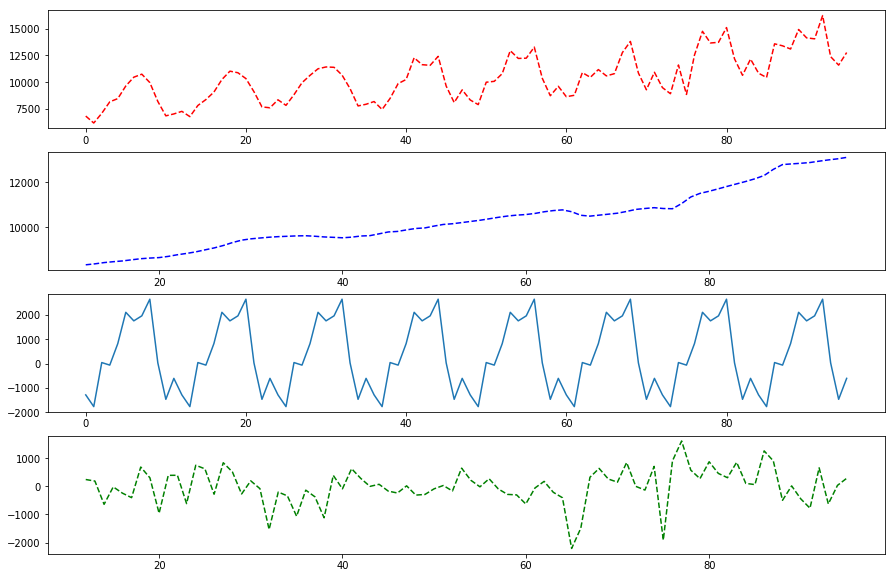

In [41]:
plt.figure(figsize=(15,10))
plt.subplot(411)
air_miles['Air miles flown'].plot(style='r--')
plt.subplot(412)
trendComp.plot(style='b--')
plt.subplot(413)
plt.plot(seasonalComp)
plt.subplot(414)
irr_var.plot(style='g--')

In [44]:
residuals = air_miles['Air miles flown'] / trendComp
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
seasonalComp = np.array([monthwise_avg.values[:12]]*nb_years).reshape((12*nb_years,))
irr_var = air_miles['Air miles flown'] / (trendComp * seasonalComp)

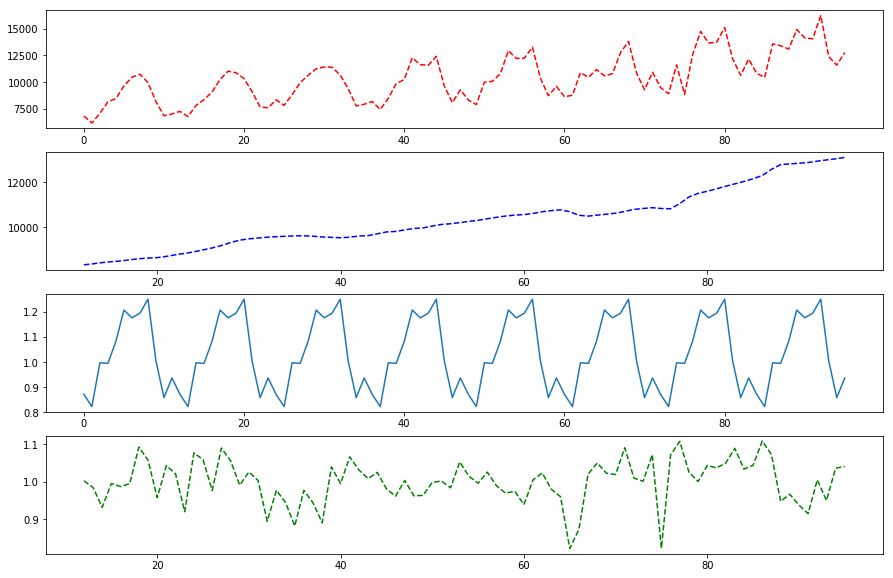

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(411)
air_miles['Air miles flown'].plot(style='r--')
plt.subplot(412)
trendComp.plot(style='b--')
plt.subplot(413)
plt.plot(seasonalComp)
plt.subplot(414)
irr_var.plot(style='g--')